# Dataset

In [1]:
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['label'] = y
df.head()

,feature_1,feature_2,label
0,0.242771,0.890981,0
1,-0.579611,0.506188,1
2,0.242598,0.122096,1
3,1.683483,-0.100590,1
4,2.006967,-0.793060,1


In [5]:
import matplotlib.pyplot as plt

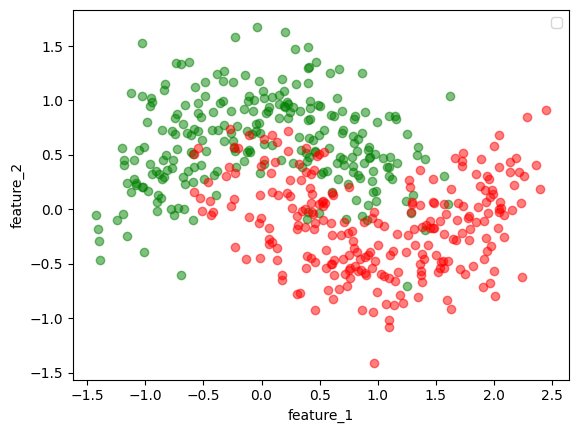

In [6]:
df_green = df[df['label']==0]
df_red = df[df['label']==1]

plt.figure()
plt.scatter(df_green['feature_1'], df_green['feature_2'], alpha=0.5, color='green')
plt.scatter(df_red['feature_1'], df_red['feature_2'], alpha=0.5, color='red')
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.legend()
plt.show()

In [7]:
import numpy as np
nuevo_rango = (0,5)
X = np.interp(X, (X.min(), X.max()), nuevo_rango)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
from sklearn.naive_bayes import CategoricalNB

In [29]:
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB()

In [30]:
y_pred = clf.predict(X_test)
print(len(y_pred))
print(y_pred)

100
[1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1]


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.84

In [13]:
df_resultado = pd.DataFrame(X_test, columns=['feature_1', 'feature_2'])
df_resultado['real'] = y_test
df_resultado['pred'] = y_pred
df_resultado.head()

,feature_1,feature_2,real,pred
0,4.091242,1.071323,1,1
1,4.069292,2.506004,1,1
2,1.662512,1.253810,1,1
3,4.659213,2.449567,1,1
4,3.074125,2.291285,0,1


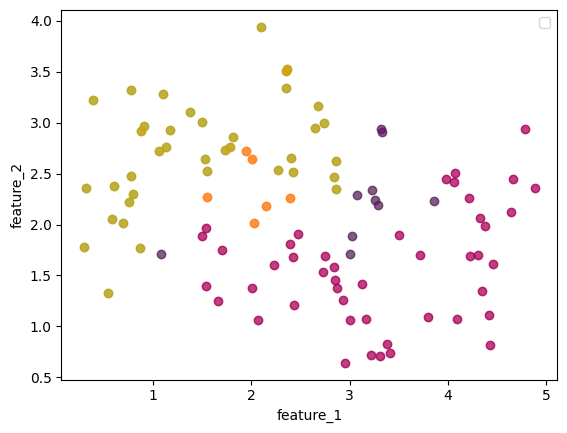

In [14]:
df_real_green = df_resultado[df_resultado['real']==0]
df_real_red = df_resultado[df_resultado['real']==1]

df_pred_orange = df_resultado[df_resultado['pred']==0]
df_pred_purple = df_resultado[df_resultado['pred']==1]

plt.figure()
plt.scatter(df_real_green['feature_1'], df_real_green['feature_2'], alpha=0.5, color='green')
plt.scatter(df_real_red['feature_1'], df_real_red['feature_2'], alpha=0.5, color='red')

plt.scatter(df_pred_orange['feature_1'], df_pred_orange['feature_2'], alpha=0.5, color='orange')
plt.scatter(df_pred_purple['feature_1'], df_pred_purple['feature_2'], alpha=0.5, color='purple')

plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.legend()
plt.show()

# Matriz de confusión

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

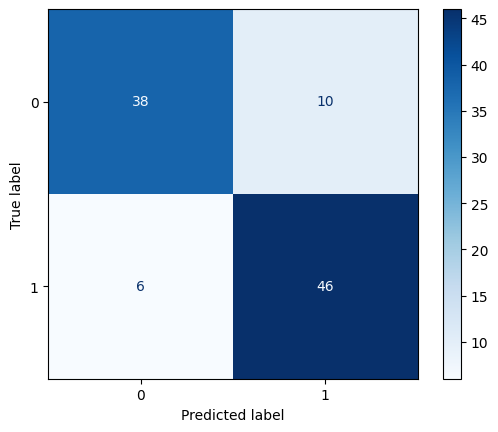

In [16]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues, normalize=None)

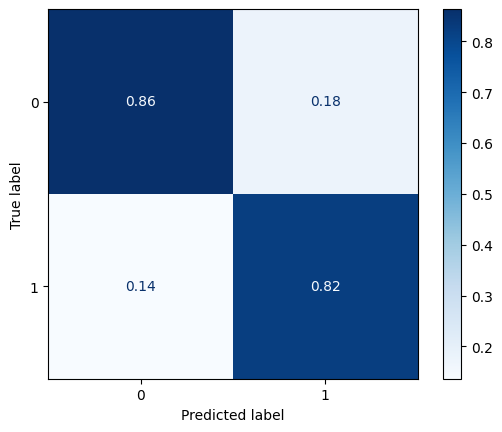

In [17]:
# Precicion por etiqueta
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

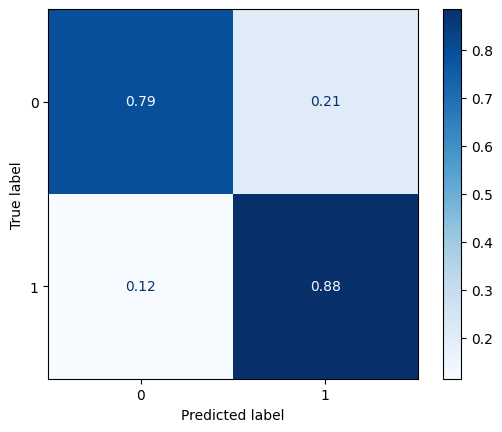

In [18]:
# Recall por etiqueta
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

# Maquinas de vector de soporte: hiperplanos
Las maquinas de vector de soporte son los primeros modelos que no estan basado en un ningun metodo probabilistico, este modelo esta basado en un modelado geometrico y que se resuelve mediante un problema de optimizacion con restricciones.
Este modelado crea hiperplanos.

In [19]:
from sklearn.svm import SVC

In [22]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(len(y_pred))

100
[1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0
 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1]


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test, y_pred)

array([[45,  3],
       [ 4, 48]])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.93